In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# Read in data
df = pd.read_csv("data/food-consumption.csv")
df.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5


In [75]:
# Clean the data
df1 = df.copy()
removeRows = ['Sweden','Finland','Spain']

df1 = df1[~df1['Country'].isin(removeRows)].reset_index(drop=True)
df1

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


In [76]:
# Checking if there is any missing data
df1.isna().any()

Country           False
Real coffee       False
Instant coffee    False
Tea               False
Sweetener         False
Biscuits          False
Powder soup       False
Tin soup          False
Potatoes          False
Frozen fish       False
Frozen veggies    False
Apples            False
Oranges           False
Tinned fruit      False
Jam               False
Garlic            False
Butter            False
Margarine         False
Olive oil         False
Yoghurt           False
Crisp bread       False
dtype: bool

In [77]:
columnNames = df1.columns.drop('Country')

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separating out the features
x = df1.loc[:, columnNames].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)

# principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal component 1', 'Principal component 2'])

In [79]:
pca.fit(x)
print("The principal components are {}.".format(pca.components_))
print("The explained variance is {}".format(pca.explained_variance_))
principalComponents = pca.fit_transform(x)
variance = pca.explained_variance_ratio_ #calculate variance ratios
print("The explained variance ratio for each component is {}".format(variance))
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
print("The cumulative variance for the 2 components is {:.2f}%".format(var[1]))


The principal components are [[-0.00783844 -0.25088295 -0.26379551 -0.3075616  -0.24333708 -0.19829443
  -0.27740544 -0.17786406 -0.16708899 -0.27206292 -0.28289229 -0.219254
  -0.35276092 -0.2361455   0.20987329 -0.11823783 -0.19339383  0.14145774
  -0.13612727 -0.14655957]
 [-0.4084629   0.29072317  0.08012012 -0.16292522  0.15635054  0.27659622
   0.21002179 -0.1021976  -0.43127954 -0.30435236 -0.03059694 -0.13242838
   0.08723895  0.26308945 -0.04367603  0.09016861 -0.31240199 -0.02485444
   0.02732938 -0.27792015]].
The explained variance is [7.27704171 3.62085054]
The explained variance ratio for each component is [0.33586346 0.16711618]
The cumulative variance for the 2 components is 50.30%


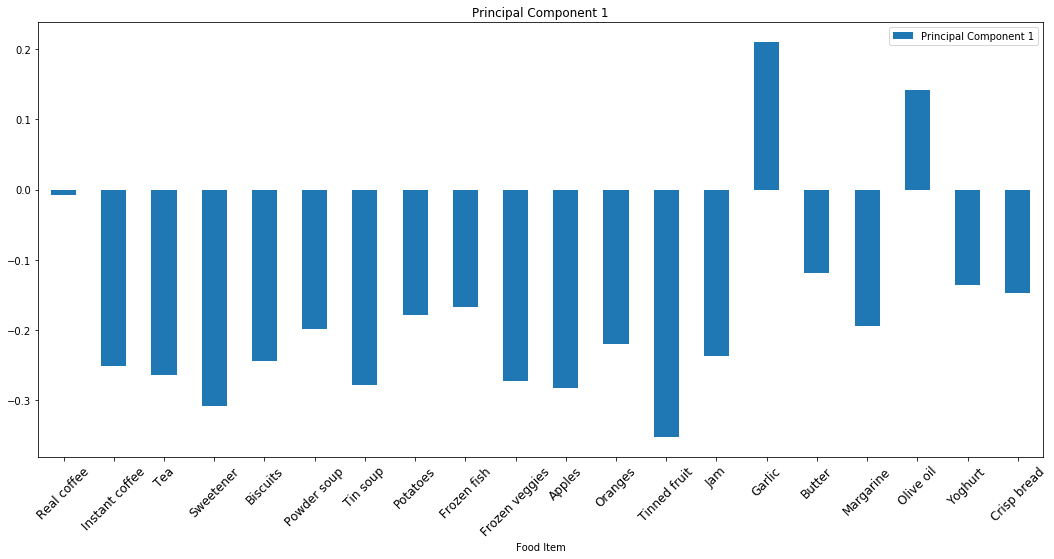

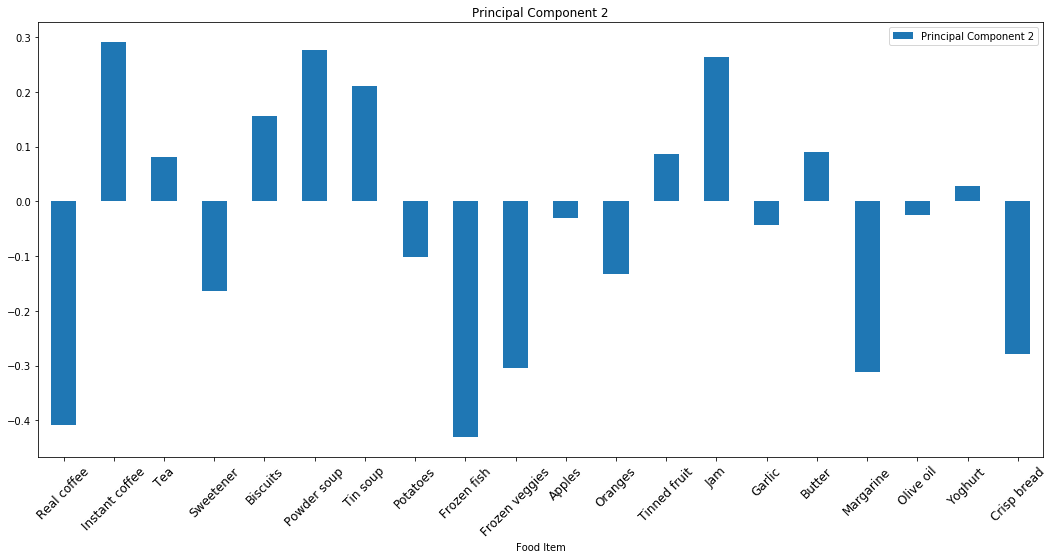

In [80]:
df = pd.DataFrame(pca.components_,columns=df1.columns[1:],index = ['Principal Component 1','Principal Component 2'])
df= df.transpose()
df['Food Item'] = df.index

ax = df.plot.bar(x='Food Item', y='Principal Component 1', rot=0,figsize = (18,8))
plt.title("Principal Component 1")
plt.xticks(fontsize=12, rotation=45)
plt.show()

ax = df.plot.bar(x='Food Item', y='Principal Component 2', rot=0,figsize = (18,8))
plt.title("Principal Component 2")
plt.xticks(fontsize=12, rotation=45)
plt.show()


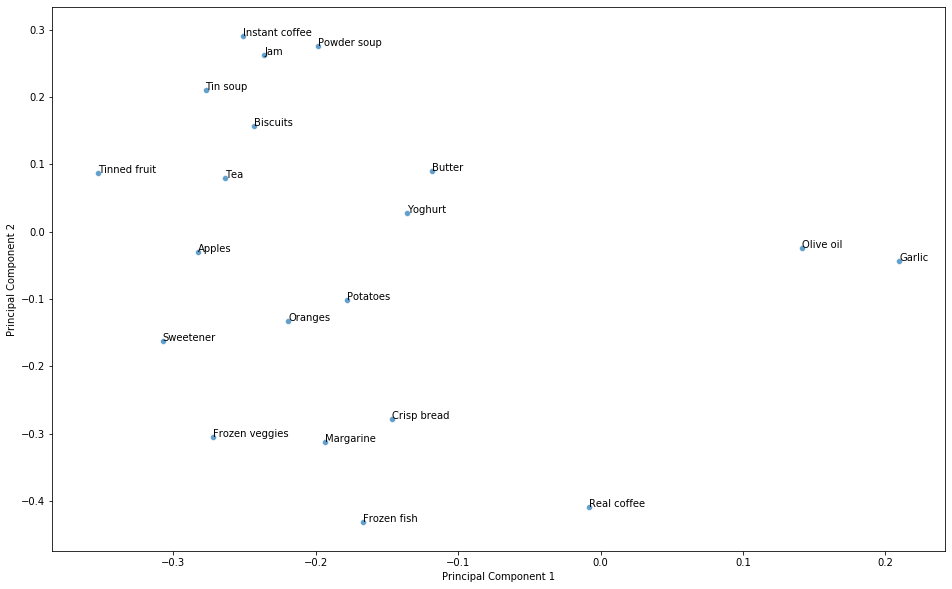

In [81]:
components = pd.DataFrame(pca.components_.T)
components = components.rename ({0:"Principal Component 1",1:"Principal Component 2"}, axis = 'columns')
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="Principal Component 1", y="Principal Component 2",
    palette=sns.color_palette("hls", 10),
    data=components,
    legend="full",
    alpha=0.7
)
foods = df1.columns.values
foods = np.delete(foods,0)

for i in range(0,len(foods)):
    p1.text(components['Principal Component 1'][i], 
            components['Principal Component 2'][i], 
            foods[i])

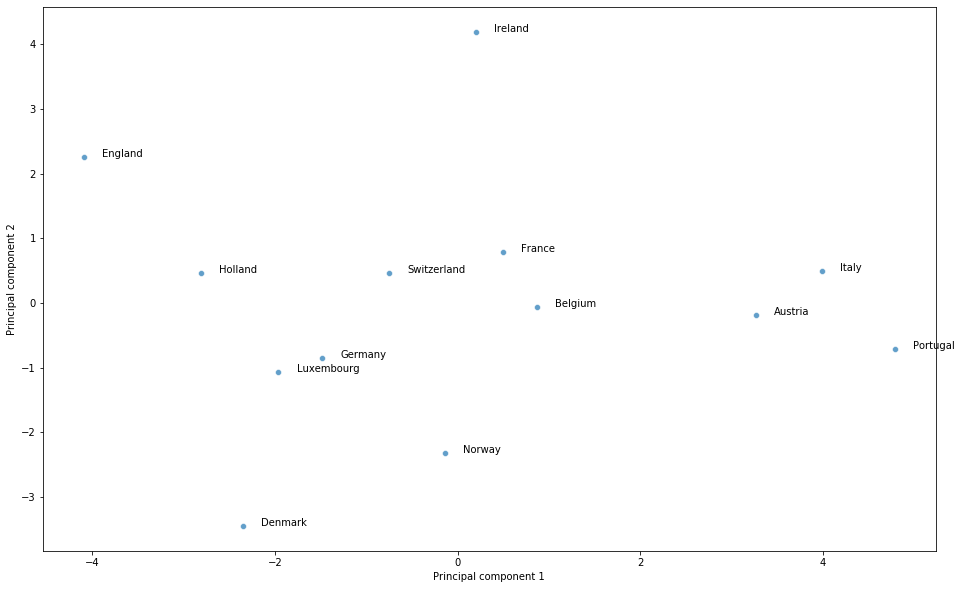

In [82]:
import seaborn as sns
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(
    x="Principal component 1", y="Principal component 2",
    palette=sns.color_palette("hls", 10),
    data=principalDf,
    legend="full",
    alpha=0.7
)

for i in range(0,len(df1)):
    p1.text(principalDf['Principal component 1'][i]+0.2, 
            principalDf['Principal component 2'][i], 
            df1['Country'][i])